<div style="text-align: center; margin: 50px">

<h1 style="color: blue; text-align: center;">Representation of Single-Qubit (R_x 90) Gate with Qiskit Pulse.</h1>

</div>

### Overview:
 1. [Importing Necessary Libraries and Provider](#part1)<br><br>
2. [Calibrating Pulse using amplitude from Rabi Experiment](#part2)<br><br>
3. [Implementing the calibrated Pulse in a Quantum Circuit](#part3)<br><br>
4. [Executing the Circuit](#part4)<br><br>

<a id = 'part1'></a>
## Importing Necessary Libraries And Provider:

In [1]:
from qiskit.tools.jupyter import *
from qiskit.tools.monitor import job_monitor
from qiskit import assemble, pulse, QuantumCircuit, schedule, transpile
from qiskit.circuit import Gate
from qiskit.providers.aer import PulseSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.pulse.library import Gaussian
from qiskit.test import mock
from qiskit.visualization import plot_histogram
from qiskit.visualization.pulse_v2 import draw
import matplotlib.pyplot as plt
import numpy as np
from qiskit.visualization import plot_bloch_vector

<a id = 'part2'></a>
## Calibrating Pulse using amplitude from Rabi Experiment:

In [2]:
half_pi_amp = 0.06998252668221455

In [3]:
backend = mock.FakeArmonk()
custom_gate = Gate(name='rx_90', label='rx_90', num_qubits=1, params=[])

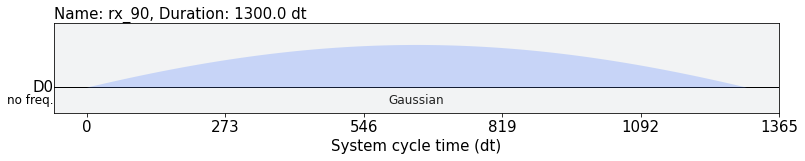

In [4]:
with pulse.build(backend, name='rx_90') as gate_pulse:

    microwave = Gaussian(duration=1300, amp=half_pi_amp, sigma=1100)
    pulse.play(microwave, pulse.drive_channel(0))
gate_pulse.draw()

<a id = 'part3'></a>
## Implementing the calibrated Pulse in a Quantum Circuit:

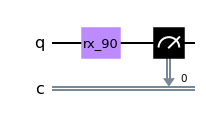

In [5]:
qc = QuantumCircuit(1, 1)
# append the custom gate
qc.append(custom_gate, [0])
qc.measure(0, 0)
# define pulse of quantum gate
qc.add_calibration('rx_90', [0], gate_pulse)
qc.draw('mpl')


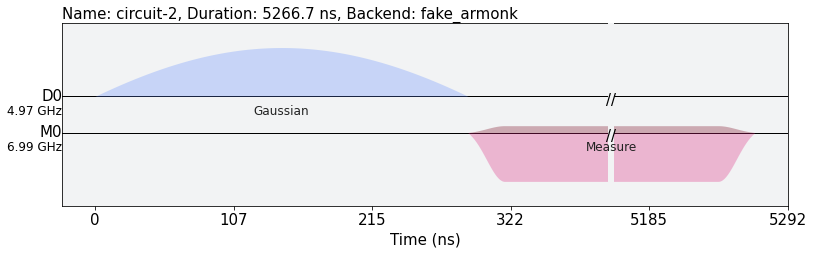

In [6]:
qc_t = transpile(qc, backend)
qc_pulse = schedule(qc_t, backend)
draw(qc_pulse, backend=backend)

<a id = 'part4'></a>
## Executing the Circuit:

/opt/conda/lib/python3.8/site-packages/qiskit/providers/aer/pulse/system_models/string_model_parser/string_model_parser.py:280: DeprecationWarning: Using the `__mul__` operator `A * B` as shorthand for `A.dot(B)` is deprecated as of version 0.17.0 and will be  removed no earlier than 3 months after the release date. As an alternative, use the compose operator `B & A` in place of `A * B` as a replacement.
  stack.append(op1 * op2)


[ 7.14890067e-01+2.71118700e-04j -6.44788516e-01+2.70517816e-01j
 -3.39309148e-06+1.16179307e-05j]


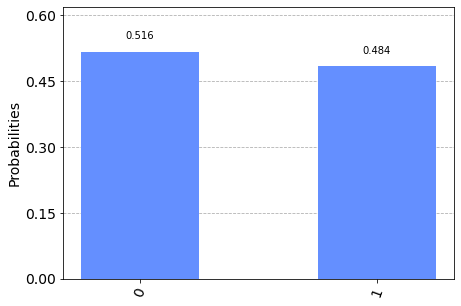

In [7]:
backend_sim = PulseSimulator()
backend_model = PulseSystemModel.from_backend(backend)
pulse_qobj = assemble(qc_pulse, backend_sim)
# run the job on the backend
import warnings
warnings.filterwarnings('ignore')
sim_result = backend_sim.run(pulse_qobj,backend_model).result(timeout = 120)
state = sim_result.get_statevector()
print(state)
plot_histogram(sim_result.get_counts())